In [1]:
'''
Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df
'''

'\nPerform Principal component analysis and perform clustering using first \n3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain \noptimum number of clusters and check whether we have obtained same number of clusters with the original data \n(class column we have ignored at the begining who shows it has 3 clusters)df\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 84A1-6D3A

 Directory of C:\Users\hp\Documents\EXCELR\DS_Assign_Ans

07/29/2023  12:43 PM    <DIR>          .
07/28/2023  12:05 PM    <DIR>          ..
07/29/2023  12:39 PM    <DIR>          .ipynb_checkpoints
07/26/2023  05:55 PM           783,051 50_startups data-MLR.ipynb
07/26/2023  12:10 PM             2,438 50_Startups.csv
07/28/2023  07:07 PM            81,413 Airlines_DBSCAN.ipynb
07/28/2023  07:12 PM           159,209 Airlines_Hierarchical_clustering.ipynb
07/28/2023  07:09 PM           145,996 Airlines_Kmeans.ipynb
07/26/2023  06:03 PM         4,610,348 bank-full.csv
04/26/2023  08:47 AM    <DIR>          Basic_Stats_L1
04/26/2023  08:57 AM    <DIR>          Basic_Stats_L2
04/15/2023  10:24 PM    <DIR>          Clustering
07/26/2023  05:55 PM         2,508,902 Corolla-MLR.ipynb
07/28/2023  04:49 PM             1,328 crime_data.csv
07/28/2023  07:06 PM           195,493 Crime_DBSCAN.ipynb
07/28/2023  07:06 PM           

In [4]:
data=pd.read_csv("wine.csv")
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
#Checking for null and Duplicate
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
data['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [9]:
data1=data.iloc[:,1:]
data1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
data1.shape

(178, 13)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
#Standardization the data

In [13]:
scaler=StandardScaler()
scaler.fit(data1)

StandardScaler()

In [14]:
scaled_data=scaler.transform(data1)

In [15]:
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [16]:
scaled_data.shape

(178, 13)

### PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca=PCA(n_components=7)

In [19]:
pca.fit(scaled_data)


PCA(n_components=7)

In [20]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679])

In [21]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 , 89.34])

In [22]:
x_pca=pca.transform(scaled_data)

In [23]:
x_pca.shape

(178, 7)

In [24]:
x_pca

array([[ 3.31675081, -1.44346263, -0.16573904, ...,  0.69304284,
        -0.22388013,  0.59642655],
       [ 2.20946492,  0.33339289, -2.02645737, ..., -0.25765463,
        -0.92712024,  0.05377561],
       [ 2.51674015, -1.0311513 ,  0.98281867, ..., -0.25103312,
         0.54927605,  0.42420545],
       ...,
       [-2.67783946, -2.76089913, -0.94094188, ...,  1.271355  ,
         0.27306792,  0.67923541],
       [-2.38701709, -2.29734668, -0.5506962 , ...,  0.81395522,
         1.17878298,  0.63397527],
       [-3.20875816, -2.76891957,  1.01391366, ..., -0.89519259,
         0.29609218,  0.00574126]])

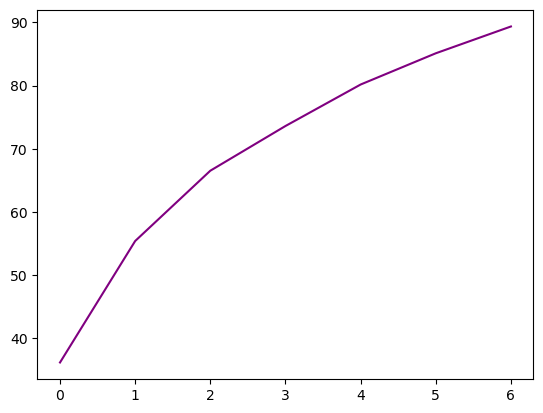

In [25]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="purple")

In [26]:
# Final Dataframe 
# Three Principle Component
data2=pd.concat([data['Type'],pd.DataFrame(x_pca[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
data2

,Type,PC1,PC2,PC3
0,1,3.316751,-1.443463,-0.165739
1,1,2.209465,0.333393,-2.026457
2,1,2.516740,-1.031151,0.982819
3,1,3.757066,-2.756372,-0.176192
4,1,1.008908,-0.869831,2.026688
...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570
174,3,-2.601956,-1.757229,0.207581
175,3,-2.677839,-2.760899,-0.940942
176,3,-2.387017,-2.297347,-0.550696


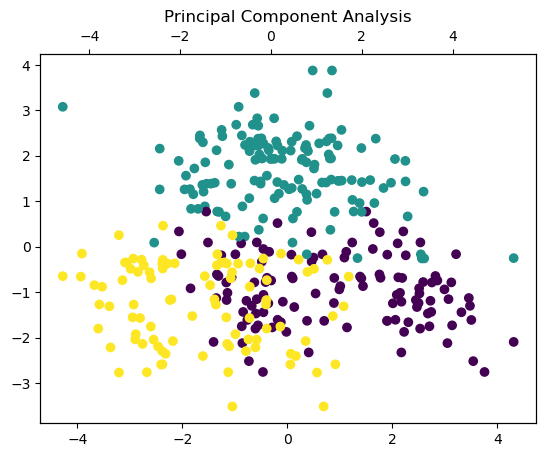

In [27]:
# In 2D Visualization
fig, ax = plt.subplots()
ay = ax.twiny()

ax.scatter(x_pca[:,0],x_pca[:,1],c=data2['Type'])
ay.scatter(x_pca[:,2], x_pca[:,1],c=data2['Type'])

plt.title("Principal Component Analysis")
plt.show()

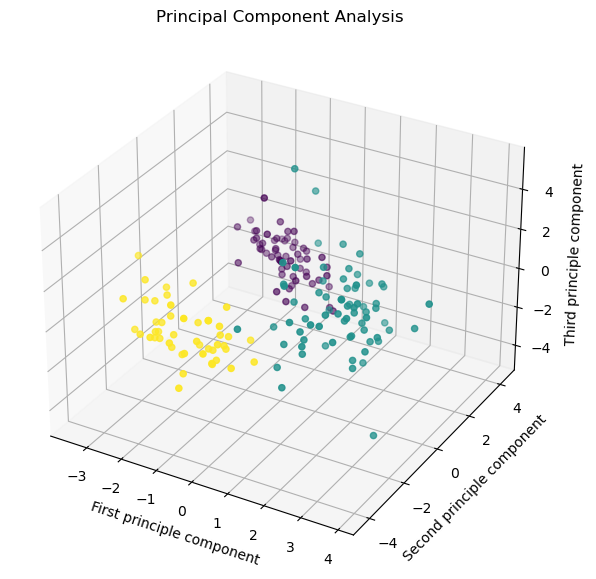

In [28]:
# In 3D Visualization

# Creating dataset
z = x_pca[:,2]
x = x_pca[:,1]
y = x_pca[:,0]
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, c=data2['Type'])
plt.title("Principal Component Analysis")
ax.set_xlabel('First principle component')
ax.set_ylabel('Second principle component')
ax.set_zlabel('Third principle component')
plt.show()

### Heirarchical Clustering

In [31]:
#  Normalizing Dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data2)
print(data_norm)

[[0.         0.88409355 0.28044707 0.44502757]
 [0.         0.75524083 0.52098937 0.25765258]
 [0.         0.79099786 0.33626383 0.56068773]
 [0.         0.93533214 0.10271162 0.44397497]
 [0.         0.6155344  0.35810263 0.66580576]
 [0.         0.85308182 0.18853559 0.39833717]
 [0.         0.7831255  0.31681056 0.36332375]
 [0.         0.73778236 0.25804241 0.47644818]
 [0.         0.79031526 0.35157211 0.28338035]
 [0.         0.81856406 0.36898588 0.36260348]
 [0.         0.9030599  0.2995525  0.41914796]
 [0.         0.70232687 0.39300963 0.34179568]
 [0.         0.7440692  0.38438229 0.37460304]
 [0.         0.9005487  0.32279689 0.3404465 ]
 [0.         1.         0.19211296 0.33444109]
 [0.         0.76637997 0.25078783 0.48366041]
 [0.         0.75087591 0.16079663 0.54547303]
 [0.         0.71910927 0.25500921 0.54176564]
 [0.         0.91030363 0.13493476 0.4128317 ]
 [0.         0.74070149 0.33220437 0.4451275 ]
 [0.         0.86171036 0.36932981 0.42497329]
 [0.         

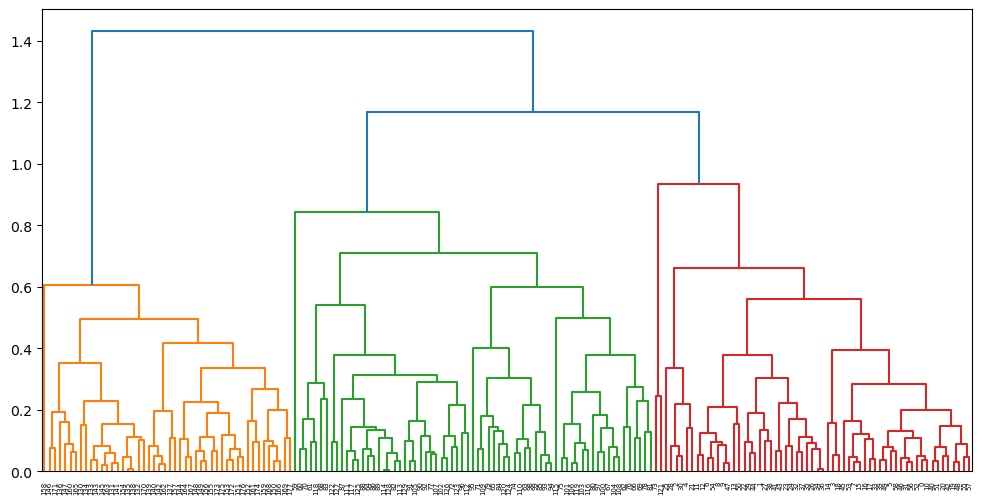

In [33]:
# creating dendrogram
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12,6))  
dendrogram = sch.dendrogram(sch.linkage(data_norm,method='complete'))
plt.show()

In [35]:
# create clusters as 3
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [36]:
y_hc = hc.fit_predict(data_norm)

In [37]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
data2['h_clusterid'] = Clusters

In [38]:
#No.of clusters formed

data2['h_clusterid'].value_counts()

2    69
0    61
1    48
Name: h_clusterid, dtype: int64

### K-Means Clustering

In [39]:
from sklearn.cluster import KMeans

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


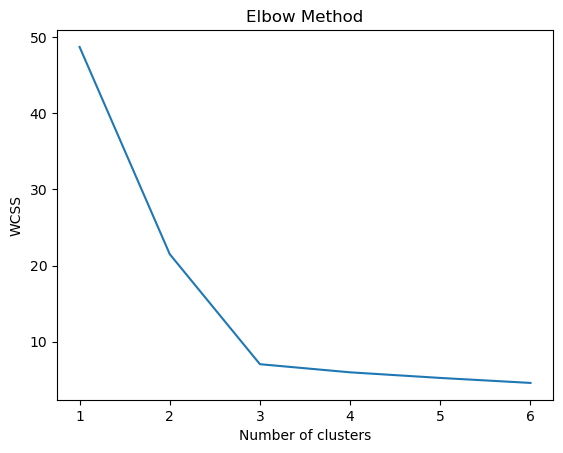

In [41]:
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
#Build Cluster algorithm

clusters_new = KMeans(4, random_state=42)
clusters_new.fit(data_norm)

KMeans(n_clusters=4, random_state=42)

In [44]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3,
       3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [45]:
#Assign clusters to the data set
data2['clusterid_new'] = clusters_new.labels_

In [46]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 5.00000000e-01,  3.98368859e-01,  7.04276059e-01,
         4.74518924e-01],
       [-6.66133815e-16,  7.63767571e-01,  3.44830071e-01,
         4.45650308e-01],
       [ 1.00000000e+00,  1.78326980e-01,  3.07813814e-01,
         4.42502079e-01],
       [ 5.00000000e-01,  6.48772932e-01,  6.88674912e-01,
         5.10126758e-01]])

In [47]:
data2['h_clusterid'].value_counts()

2    69
0    61
1    48
Name: h_clusterid, dtype: int64